# Statistical Analysis of a Dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.neighbors import KernelDensity

In [2]:
pima_indians_diabetes_db = pd.read_csv("diabetes.csv")

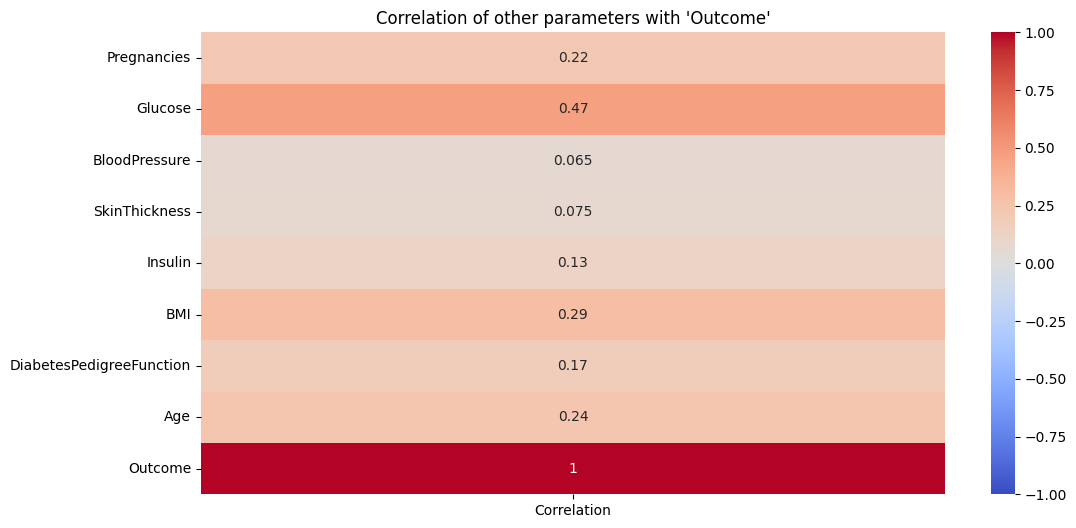

In [3]:
parameter_correlation = pima_indians_diabetes_db.corrwith(pima_indians_diabetes_db['Outcome'])

correlation_df = pd.DataFrame(parameter_correlation, columns=['Correlation'])

# Plot the correlation values in a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f"Correlation of other parameters with 'Outcome'")
plt.show()

### The outcome has the most corelation with Glucose ie 0.47
### So we further examine Glucose data series

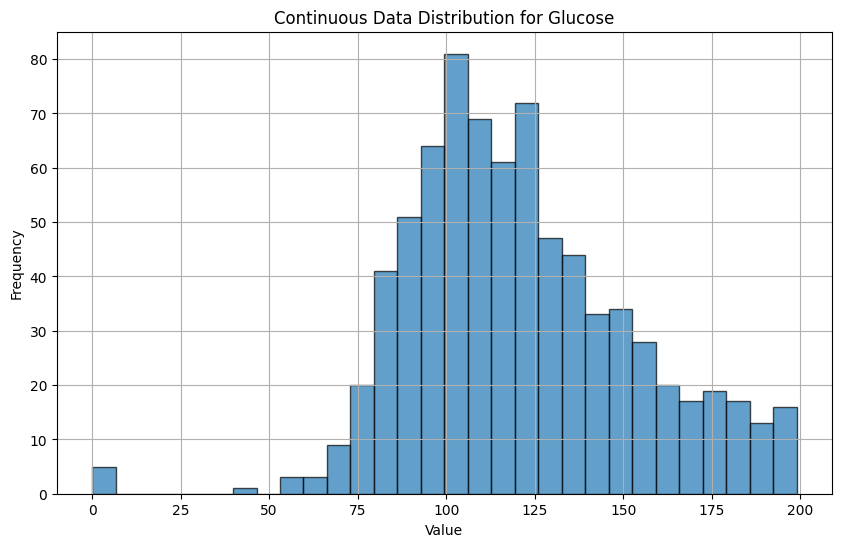

In [4]:
glucose_series = pima_indians_diabetes_db['Glucose']

# Create the histogram
num_bins = 30
plt.figure(figsize=(10, 6))
plt.hist(glucose_series, bins=num_bins, edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Continuous Data Distribution for Glucose')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### At a glance the histogram seems to depict a normal distribution, so let's verify this with a QQ plot

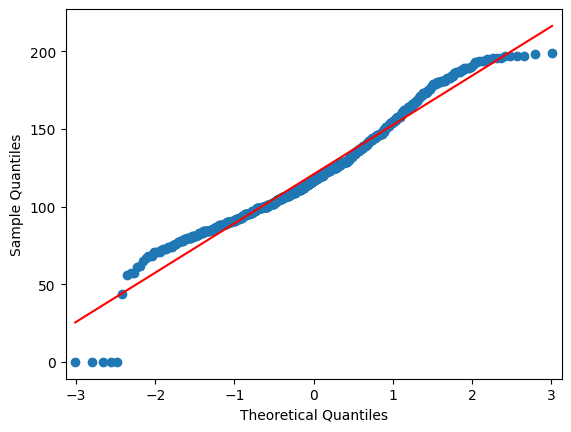

In [5]:
sm.qqplot(glucose_series, line='r')
plt.show()

### So we can see that the glucose dataset follows a roughly normal distribution with only the tails not lying on the line. So we can assume normal distribution for the dataset

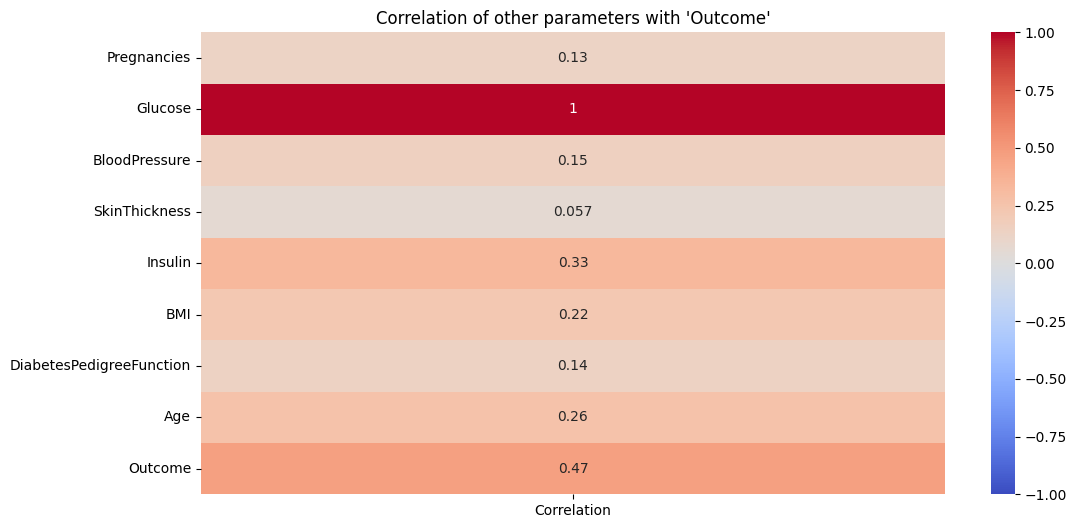

In [6]:
parameter_correlation = pima_indians_diabetes_db.corrwith(pima_indians_diabetes_db['Glucose'])

correlation_df_glucose = pd.DataFrame(parameter_correlation, columns=['Correlation'])

# Plot the correlation values in a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_df_glucose, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f"Correlation of other parameters with 'Outcome'")
plt.show()

## Analysis of the the 'Insulin' feature

In [7]:
insulin_series = pima_indians_diabetes_db["Insulin"]

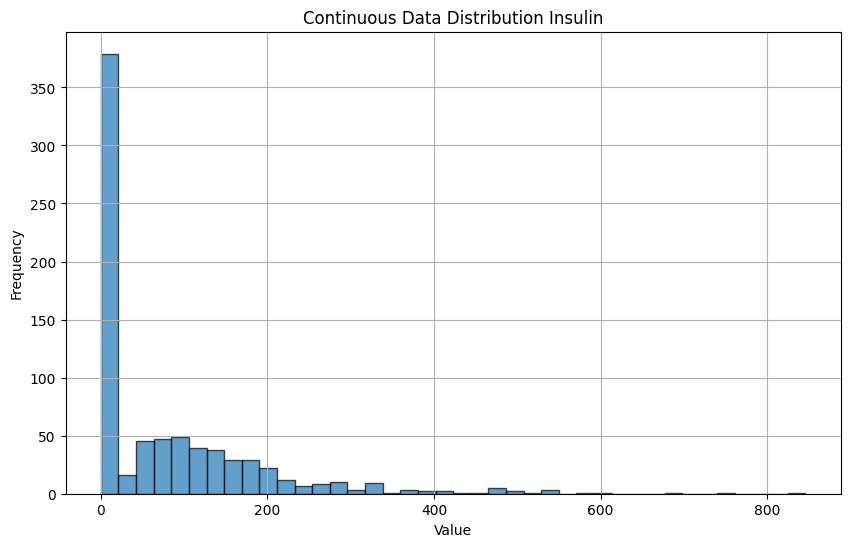

In [8]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(insulin_series, bins=40, edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Continuous Data Distribution Insulin')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### The histogram of the insulin data series does not seem to follow the normal distribution or any known distributions, so let's check whether it follows a normal distribution using qq plot

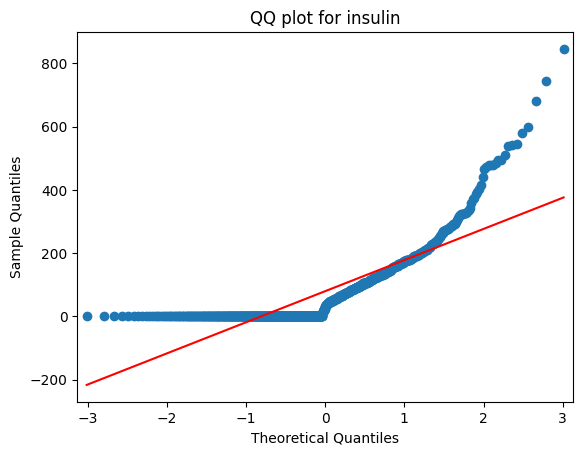

In [9]:
sm.qqplot(insulin_series, line='r')
plt.title("QQ plot for insulin")
plt.show()

### The insulin parameter of the dataset does not follow a normal distribution.

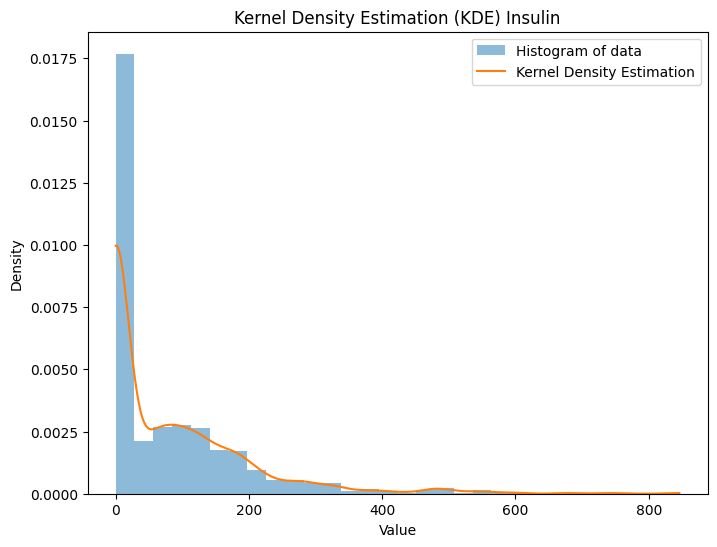

In [10]:
insulin_np = np.array(insulin_series)
kde = KernelDensity(bandwidth=20, kernel='gaussian')
kde.fit(insulin_np[:, np.newaxis])  # sklearn expects data in 2D array format

# Generate points for plotting the KDE
x_plot = np.linspace(min(insulin_np), max(insulin_np), 1000)
log_dens = kde.score_samples(x_plot[:, np.newaxis])

# Plot the data and the KDE
plt.figure(figsize=(8, 6))
plt.hist(insulin_series, bins=30, density=True, alpha=0.5, label='Histogram of data')
plt.plot(x_plot, np.exp(log_dens), label='Kernel Density Estimation')
plt.title('Kernel Density Estimation (KDE) Insulin')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### So using Kerner Density Estimation we can use the above graph as the distribution graph for the insulin parameter

## Further testing using KDE

<p>
    KDE has two main parameters.
        <li> Bandwidth
        <li> Kernel distribution
   <br>
            <b>Kernel distribution</b> - This is used to specify the type of distribution applied over each kernel (data point) of the dataset.
                        This effects the overall shape of the KDE curve. As different kernel distributions will result in        different curves.
   <br>
            <b> Bandwidth</b> - This is used to specify the standard deviation of each kerner of the dataset. The bigger the value of the bandwidth, the smoother the curve. We must find the perfect value of the bandwidth to capture the underlying characteristics of the dataset.
</p>

#### Effects of bandwidth and kernel distribution on KDE plot

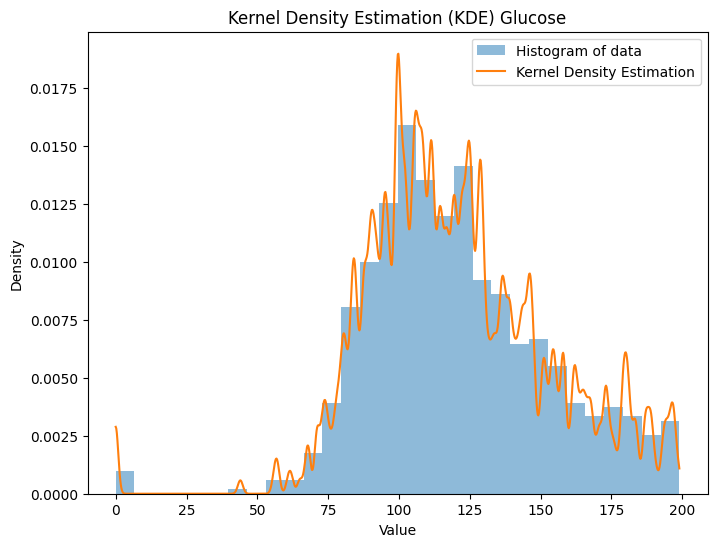

In [11]:
"""
Bandwidth = 0.9
kernel distribution = gaussian
Very small Bandwidth value, causes the curve to not generalize well and model all of the noise in the dataset
"""
kde = KernelDensity(bandwidth= 0.9, kernel='gaussian')
check_numpy = np.array(glucose_series)
kde.fit(check_numpy[:, np.newaxis]) # sklearn expects data in 2D array format

# Generate points for plotting the KDE
x_plot = np.linspace(min(glucose_series), max(glucose_series), 1000)
log_dens = kde.score_samples(x_plot[:, np.newaxis])


# Plot the data and the KDE
plt.figure(figsize=(8, 6))
plt.hist(glucose_series, bins=30, density=True, alpha=0.5, label='Histogram of data')
plt.plot(x_plot, np.exp(log_dens), label='Kernel Density Estimation')
plt.title('Kernel Density Estimation (KDE) Glucose')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

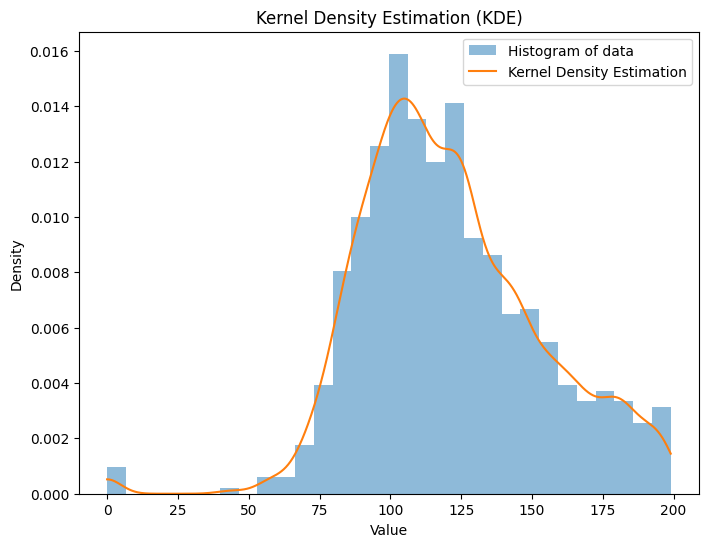

In [12]:
"""
Bandwidth = 10
kernel distribution = gaussian
Increasing Bandwidth value, causes the curve to become smoother and capture the underlying dataset distribution better
"""
kde = KernelDensity(bandwidth= 5, kernel='gaussian')
check_numpy = np.array(glucose_series)
kde.fit(check_numpy[:, np.newaxis]) # sklearn expects data in 2D array format

# Generate points for plotting the KDE
x_plot = np.linspace(min(glucose_series), max(glucose_series), 1000)
log_dens = kde.score_samples(x_plot[:, np.newaxis])


# Plot the data and the KDE
plt.figure(figsize=(8, 6))
plt.hist(glucose_series, bins=30, density=True, alpha=0.5, label='Histogram of data')
plt.plot(x_plot, np.exp(log_dens), label='Kernel Density Estimation')
plt.title('Kernel Density Estimation (KDE)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

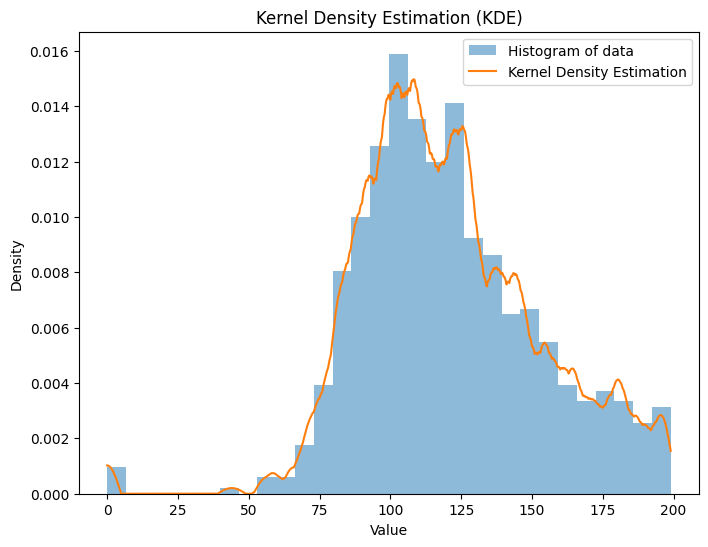

In [13]:
"""
Bandwidth = 10
kernel distribution = cosine
Changing the kernel distribution to cosine  causes the kde curve to change and is not smooth once again
"""
kde = KernelDensity(bandwidth= 5, kernel='cosine')
check_numpy = np.array(glucose_series)
kde.fit(check_numpy[:, np.newaxis]) # sklearn expects data in 2D array format

# Generate points for plotting the KDE
x_plot = np.linspace(min(glucose_series), max(glucose_series), 1000)
log_dens = kde.score_samples(x_plot[:, np.newaxis])


# Plot the data and the KDE
plt.figure(figsize=(8, 6))
plt.hist(glucose_series, bins=30, density=True, alpha=0.5, label='Histogram of data')
plt.plot(x_plot, np.exp(log_dens), label='Kernel Density Estimation')
plt.title('Kernel Density Estimation (KDE)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()